In [1]:
# Cálculo polígonos de thiessen.

import numpy as np
import pandas as pd

from scipy import spatial

from matplotlib import pyplot as plt

import geopandas as gpd
import shapely as shp

In [2]:
# Dirección de los datos.
path = "../Material/Clases/Clase 10/"

# Nombre de la cuenca.
nombres_sub = "RH19Be_subc.shp"

# Datos de estaciones.
nombre_e = "Estaciones_Guerrero_1980.csv"

In [3]:
# Abrimos la subcuenca.

Cuenca = gpd.read_file(path + nombres_sub)

# A coordenadas UTM 14N (m).
Cuenca = Cuenca.to_crs(32614)

# Datos.
print(Cuenca.loc[0])


# Forma de la cuenca.
Cuenca.explore()

ID                                                        155.0
CVE_SUBCUE                                               RH19Be
CVE_RH                                                     RH19
RH                                                 COSTA GRANDE
CVE_CUE                                                       B
CUENCA                                    R. COYUQUILLA Y OTROS
CVE_SUBC                                                      e
SUBCUENCA                                           R. Petatlán
AREA_KM2                                                 548.64
PERIMETRO                                                142.88
TIPO                                                    ABIERTA
DRENAJE1                                                 RH19Bf
DESCARGA1                                                     1
DRENAJE2                                                      -
DESCARGA2                                                     0
DRENAJE3                                

In [4]:
# Abrimos las estaciones ubicadas en guerrero.

df = pd.read_csv(path + nombre_e, index_col = "NUMERO" )

# Creamos un punto con las coordenadas.
# Vacío.
df["geometry"] = None
df["geometry"] = gpd.points_from_xy(df["LONGITUD"], df["LATITUD"])

df

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry
NUMERO,,,,,,
12064,PETATLAN,Guerrero,-101.3,17.5,926,POINT (-101.30000 17.50000)
12174,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (-101.20000 17.50000)
12025,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (-101.10000 17.40000)
12017,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (-101.00000 17.60000)
12140,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (-100.90000 17.70000)
12038,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (-100.90000 17.50000)
12054,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (-101.10000 17.80000)
12094,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (-101.10000 18.00000)
12094,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (-101.40000 17.90000)


In [5]:
# Creamos un GeoDataFrame.
Estaciones = gpd.GeoDataFrame(df, geometry = "geometry", crs = 4326)
# A coordenadas UTM 14N (m).
Estaciones = Estaciones.to_crs(32614)

# Actualizamos x, y.
Estaciones["x"] = Estaciones.centroid.x
Estaciones["y"] = Estaciones.centroid.y

# Datos
Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y
NUMERO,,,,,,,,
12064,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06
12174,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06
12025,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06
12017,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06
12140,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06
12038,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06
12054,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06
12094,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06
12094,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06


In [6]:
# Graficamos las estaciones.
Estaciones.explore()

# Polígonos de Thiessen

In [7]:
# Agregamos estaciones virtuales en los límites de la extensión de la cuenca.

# Alejamos los puntos de la cuenca para que los nuevos polígonos de Thiessen
# no toquen la cuenca.
buffer = 20000
# Obtenemos la extensión de la cuenta.
bounds = Cuenca.total_bounds
# Creamos los puntos en las esquinas e intermedio entre cada vértice
# agregando el valor del buffer.
bbox = [ [ bounds[0] - buffer, bounds[1] - buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[1] - buffer ],
         [ bounds[2] + buffer, bounds[1] - buffer ],
         [ bounds[2] + buffer, ( bounds[1] + bounds[3] ) / 2 ],
         [ bounds[2] + buffer, bounds[3] + buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[3] + buffer ],
         [ bounds[0] - buffer, bounds[3] + buffer ],
         [ bounds[0] - buffer, ( bounds[1] + bounds[3] ) / 2 ] ]
# Creamos una lista vacía con las geometrías de los puntos.
for i in range( len(bbox) ):
    bbox[i] = ( [f"B{i + 1}"] + [None] * 4
        + [shp.geometry.Point(bbox[i]), bbox[i][0], bbox[i][1] ] )
# Agregamos las estaciones virtuales.
Estaciones = pd.concat([Estaciones,
    pd.DataFrame(bbox, columns = Estaciones.columns)]
    ).reset_index( drop = True )

Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y
0,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06
2,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06
7,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06
8,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334,POINT (224065.386 1947825.995),224065.385800,1.947826e+06


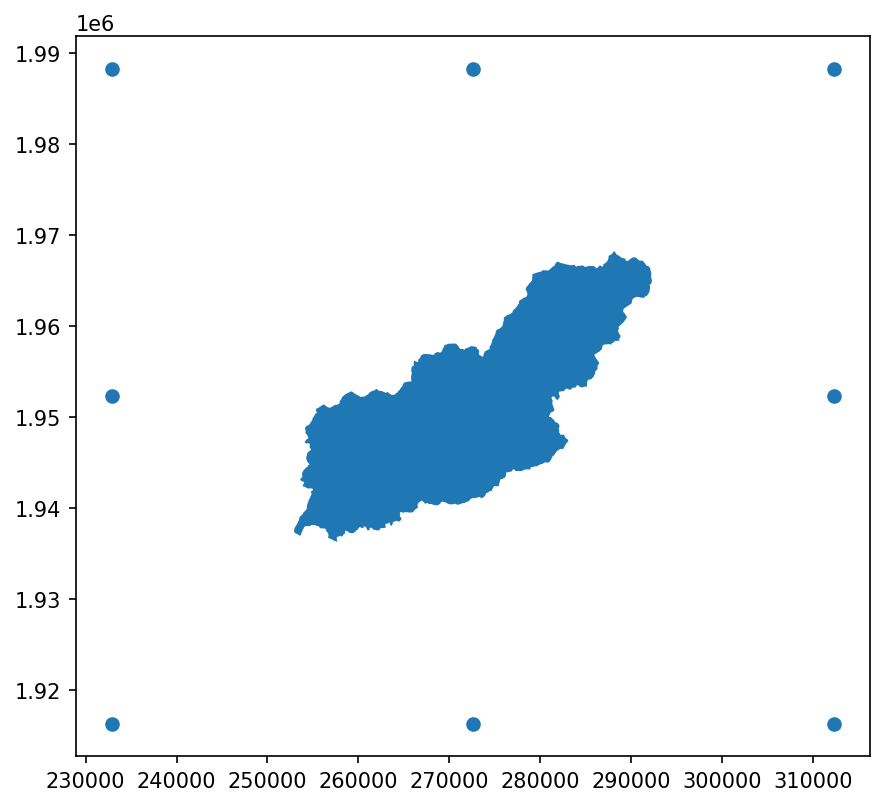

In [8]:
# Graficamos las estaciones virtuales en los límites de la cuenca.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos las subcuenca.
Cuenca.plot(ax = ax)
# Graficamos los límites.
Estaciones.iloc[-8:].plot(ax = ax)

fig.tight_layout()
plt.show()

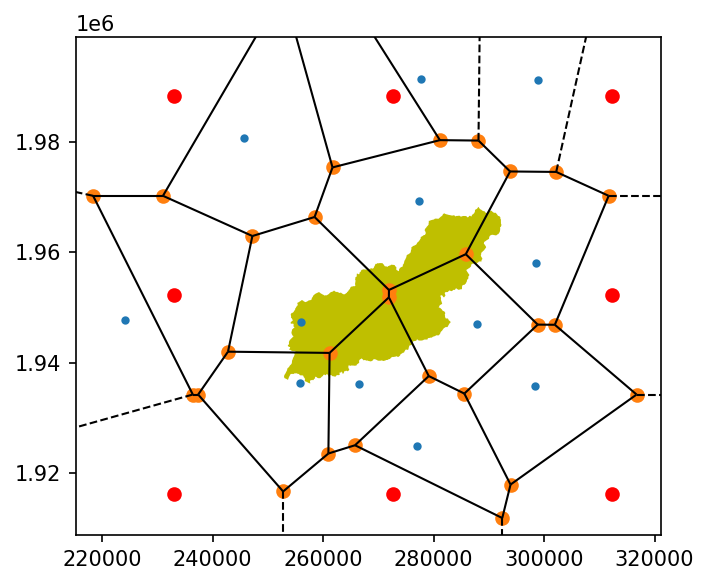

In [9]:
# Polígonos de Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Graficamos la cuenca.
Cuenca.plot(ax = ax, color = "y", zorder = 1)
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax, zorder = 2)
# Graficamos los límites.
Estaciones.loc[12:, "geometry"].plot(ax = ax, color = "r", zorder = 3)

fig.tight_layout()
plt.show()

In [10]:
# Atributos de los polígonos de Thiessen.

# Vértices --> Centroides de la triangulación.
print( Thiessen.vertices )
print()

# Indica la posición en region que corresponde a cada punto.
print( Thiessen.point_region )

# Índices de los vértices que forman cada polígono.
# Una lista vacía es un polígono "virtual" de apoyo, hay que ignorarlo.
# Un valor negativo es un vértice de apoyo en una posición muy
# lejana (infinito); no podemos definir ese polígono.
Thiessen.regions

[[ 302190.42135341 1974578.03799314]
 [ 288119.95730909 1980256.13308208]
 [ 293837.85714004 1974662.97161203]
 [ 252750.97945917 2025207.24400681]
 [ 252750.97945917 2007489.98544032]
 [ 281132.13369339 1980334.8881887 ]
 [ 261693.71119558 1975396.14305015]
 [ 236402.59606793 1934278.0023067 ]
 [ 218349.65750103 1970255.35797575]
 [ 230997.52452277 1970255.35797575]
 [ 311684.42974763 1970255.35797575]
 [ 316741.18419444 1934278.0023067 ]
 [ 301940.64163759 1946907.43225076]
 [ 285819.52743235 1959687.28534177]
 [ 298844.87941702 1946938.48491003]
 [ 237368.61615913 1934278.00230669]
 [ 260946.34226006 1923602.21705854]
 [ 252750.97945917 1916735.90924609]
 [ 265769.16534227 1925097.67609206]
 [ 279120.36731516 1937626.85999104]
 [ 285558.48038493 1934452.28469209]
 [ 292422.65440429 1911920.64620756]
 [ 293920.84237461 1917980.72042709]
 [ 247188.0610385  1962975.72203234]
 [ 242770.93556988 1942037.08751316]
 [ 258446.68381768 1966417.16876003]
 [ 261161.51633714 1941814.35692201]
 

[[],
 [2, 0, -1, 1],
 [6, 4, 3, 5],
 [5, 1, -1, 3],
 [8, -1, 7],
 [9, 4, 3, -1, 8],
 [10, 0, -1],
 [12, 10, -1, 11],
 [14, 12, 10, 0, 2, 13],
 [17, -1, 7, 15],
 [22, 20, 19, 18, 21],
 [21, -1, 17, 16, 18],
 [22, 11, 12, 14, 20],
 [22, 11, -1, 21],
 [28, 25, 23, 24, 26, 27],
 [24, 15, 7, 8, 9, 23],
 [25, 6, 4, 9, 23],
 [26, 16, 17, 15, 24],
 [28, 13, 2, 1, 5, 6, 25],
 [27, 19, 18, 16, 26],
 [28, 13, 14, 20, 19, 27]]

In [11]:
# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Lista de geometrías de Shapely.
Poly_th = []

# Iteramos para cada lista de vértices que forman un polígono.
for i in Thiessen.point_region:

    # Creamos la lista de vértices.
    Ver_th = []

    # Saltamos las listas vacías.
    if len(Thiessen.regions[i]) == 0: pass
    else:
        if -1 in Thiessen.regions[i]:
            Poly_th.append( shp.geometry.Polygon( ) )
    
        # Agregamos cada vértice que corresponde al polígono de Thiessen.
        else:
            for j in Thiessen.regions[i]:
                Ver_th.append( Thiessen.vertices[j] )

            # Agregamos nuevamente el primer vértice para cerrar el polígono.
            Ver_th.append( Ver_th[0] )

            # Convertimos a geometría de shapely.
            Poly_th.append( shp.geometry.Polygon( Ver_th ) )

# Creamos una columna del GeoDataframe con los polígonos de Thiessen.
Estaciones["Thiessen"] = Poly_th
# Establecemos como la geometría de trabajo.
Estaciones = Estaciones.set_geometry("Thiessen")

# Datos.
Estaciones


,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen
0,PETATLAN,Guerrero,-101.3,17.5,926,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((261161.516 1941814.357, 260946.342 1..."
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((271895.672 1951870.120, 279120.367 1..."
2,COYUQUILLA,Guerrero,-101.1,17.4,1072,POINT (276907.509 1925028.890),276907.509024,1.925029e+06,"POLYGON ((293920.842 1917980.720, 285558.480 1..."
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((271910.846 1953206.806, 285819.527 1..."
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((298844.879 1946938.485, 301940.642 1..."
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833,POINT (298271.295 1935874.959),298271.295442,1.935875e+06,"POLYGON ((293920.842 1917980.720, 316741.184 1..."
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((271910.846 1953206.806, 285819.527 1..."
7,CUNDANCITO,Guerrero,-101.1,18.0,1018,POINT (277647.945 1991445.131),277647.945195,1.991445e+06,GEOMETRYCOLLECTION EMPTY
8,VALLECITOS,Guerrero,-101.4,17.9,1647,POINT (245726.165 1980759.497),245726.164918,1.980759e+06,"POLYGON ((258446.684 1966417.169, 261693.711 1..."
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334,POINT (224065.386 1947825.995),224065.385800,1.947826e+06,GEOMETRYCOLLECTION EMPTY


In [12]:
# Retiramos las estaciones virtuales.

Estaciones = Estaciones.iloc[:-8].copy()
Estaciones["HP_1980"] = Estaciones["HP_1980"].astype(float)
Estaciones

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen
0,PETATLAN,Guerrero,-101.3,17.5,926.0,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((261161.516 1941814.357, 260946.342 1..."
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999.0,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((271895.672 1951870.120, 279120.367 1..."
2,COYUQUILLA,Guerrero,-101.1,17.4,1072.0,POINT (276907.509 1925028.890),276907.509024,1.925029e+06,"POLYGON ((293920.842 1917980.720, 285558.480 1..."
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465.0,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((271910.846 1953206.806, 285819.527 1..."
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903.0,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((298844.879 1946938.485, 301940.642 1..."
5,EL PORVENIR (CFE),Guerrero,-100.9,17.5,1833.0,POINT (298271.295 1935874.959),298271.295442,1.935875e+06,"POLYGON ((293920.842 1917980.720, 316741.184 1..."
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217.0,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((271910.846 1953206.806, 285819.527 1..."
7,CUNDANCITO,Guerrero,-101.1,18.0,1018.0,POINT (277647.945 1991445.131),277647.945195,1.991445e+06,GEOMETRYCOLLECTION EMPTY
8,VALLECITOS,Guerrero,-101.4,17.9,1647.0,POINT (245726.165 1980759.497),245726.164918,1.980759e+06,"POLYGON ((258446.684 1966417.169, 261693.711 1..."
9,ZIHUATANEJO (DGE),Guerrero,-101.6,17.6,1334.0,POINT (224065.386 1947825.995),224065.385800,1.947826e+06,GEOMETRYCOLLECTION EMPTY


In [13]:
# Como los polígonos de thiessen externos se extienden hasta el infinito,
# no es posible graficarlos directamente.

# Calculamos el área de influencia de la estación como la parte
# de la cuenca que cae dentro de cada polígono de thiessen.
Estaciones[Cuenca.loc[0, 'CVE_SUBCUE']] = Estaciones["Thiessen"].intersection(
    Cuenca.loc[0, "geometry"])

# Establecemos el área de influencia como la geometría de trabajo.
Estaciones = Estaciones.set_geometry(Cuenca.loc[0, 'CVE_SUBCUE'])

# Eliminamos las estaciones que no son relevantes para la cuenca.
subc_th = Estaciones[ ~ Estaciones.is_empty ].copy()
# Área de las áreas de influencia.
subc_th[f"{Cuenca.loc[0, 'CVE_SUBCUE']}_AREA"] = subc_th.area

subc_th

,ESTACION,ESTADO,LONGITUD,LATITUD,HP_1980,geometry,x,y,Thiessen,RH19Be,RH19Be_AREA
0,PETATLAN,Guerrero,-101.3,17.5,926.0,POINT (255784.912 1936343.437),255784.911724,1.936343e+06,"POLYGON ((261161.516 1941814.357, 260946.342 1...","POLYGON ((261110.999 1937538.641, 261084.675 1...",3.168658e+07
1,RANCHO NUEVO,Guerrero,-101.2,17.5,999.0,POINT (266407.362 1936217.934),266407.361726,1.936218e+06,"POLYGON ((271895.672 1951870.120, 279120.367 1...","POLYGON ((276170.804 1943441.832, 276142.063 1...",1.036975e+08
3,CASAS VIEJAS,Guerrero,-101.0,17.6,1465.0,POINT (287767.080 1947052.354),287767.079912,1.947052e+06,"POLYGON ((271910.846 1953206.806, 285819.527 1...","POLYGON ((285819.527 1959687.285, 287524.662 1...",1.210838e+08
4,SAN ANTONIO TEJAS,Guerrero,-100.9,17.7,1903.0,POINT (298493.338 1958011.291),298493.338325,1.958011e+06,"POLYGON ((298844.879 1946938.485, 301940.642 1...","POLYGON ((285819.527 1959687.285, 289958.926 1...",2.549987e+07
6,LAS PILAS DEL RIO FRIO,Guerrero,-101.1,17.8,1217.0,POINT (277398.430 1969305.994),277398.429729,1.969306e+06,"POLYGON ((271910.846 1953206.806, 285819.527 1...","POLYGON ((285819.527 1959687.285, 271910.846 1...",1.181229e+08
10,SAN JERONIMITO,Guerrero,-101.3,17.6,789.0,POINT (255918.987 1947413.887),255918.987305,1.947414e+06,"POLYGON ((271910.846 1953206.806, 258446.684 1...","POLYGON ((271910.846 1953206.806, 271895.672 1...",1.488197e+08


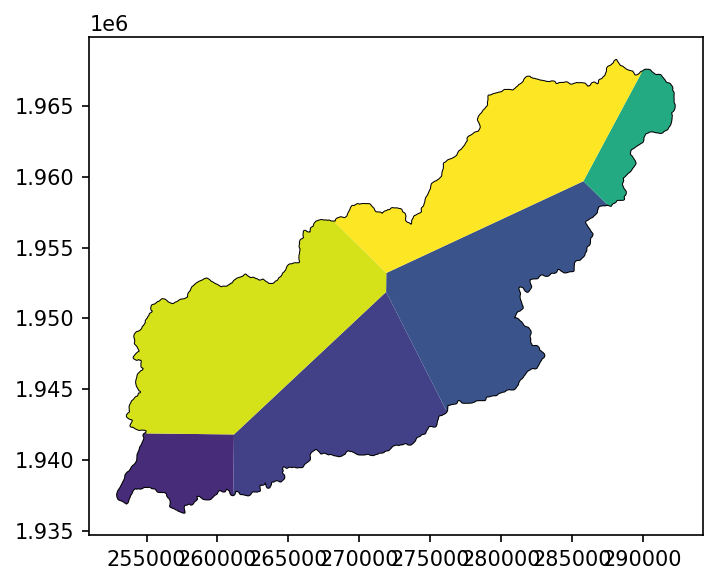

In [14]:
# Áreas de influencia

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Graficamos la cuenca.
Cuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las áreas de influencia.
Estaciones.plot("HP_1980", ax = ax)

fig.tight_layout()
plt.show()

In [15]:
# Tarea.
# Para las estaciones de Baja California, escoger la tormenta
# que sucede el 1° de enero de 2023 entre la 1:30 y las 15:30,
# inclusive. Ajusta la precipitación de la Isla Coronado
# para que a la 1:30 se tenga 0 mm, a las 2:00 haya 0.2 mm,
# a las 3:00 haya 0.5 mm. Calcula los polígonos de Thiessen.
# Grafica todas las subcuencas de la región hidrológica 1.
# Para la subcuenca que te indique el profesor, calcula las áreas de
# influencia de los polígonos de Thiessen que caen dentro de la subcuenca
# y calcula la precipitación media por Thiessen.